# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 4</font>
***

## Trabalho sobre correlação e regressão

Utilizando os conhecimentos adquiridos em nosso treinamento realize a análise de regressão proposta abaixo.

Siga o roteiro proposto e vá completando as células vazias.

# <font color=green>DATASET DO PROJETO</font>
***

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.

Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).

### Dados:
- **temp_media** - Temperatura Média (°C)
- **consumo** - Consumo de Cerveja (litros)


---

### Solução do problema com dependência do statsmodels

In [0]:
# !pip install scipy==1.2 --upgrade

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, scipy, statsmodels</font>

In [9]:
import pandas as pd 
import numpy as np
import scipy 
import statsmodels as sm
import seaborn as sns

### Importe o dataset

In [4]:
dados = pd.read_csv("dados_projeto.csv", sep = ";")

### Visualize o conteúdo do DataFrame

In [5]:
dados.head()

,Y,X
0,25461,27.30
1,28972,27.02
2,30814,24.82
3,29799,23.98
4,28900,23.82


In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       365 non-null    int64  
 1   X       365 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 5.8 KB


### Obtenha e avalie as estatísticas descritivas dos dados

In [7]:
dados.describe()

,Y,X
count,365.000000,365.000000
mean,25401.367123,21.226356
std,4399.142703,3.180108
min,14343.000000,12.900000
25%,22008.000000,19.020000
50%,24867.000000,21.380000
75%,28631.000000,23.280000
max,37937.000000,28.860000


### Análise gráfica
### Construa um box plot para cada variável do dataset

<AxesSubplot:title={'center':'Box plot'}, xlabel='Temperatura (°C)'>

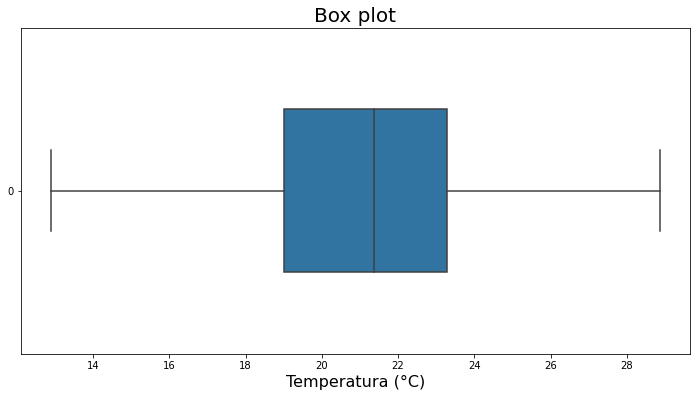

In [14]:
ax = sns.boxplot(data=dados.X, orient='h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Box plot', fontsize=20)
ax.set_xlabel('Temperatura (°C)', fontsize=16)
ax

<AxesSubplot:title={'center':'Box plot'}, xlabel='Litros (l)'>

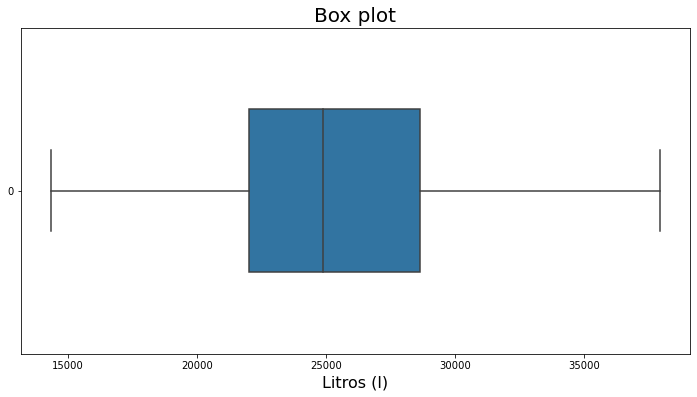

In [15]:
ax = sns.boxplot(data=dados.Y, orient='h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Box plot', fontsize=20)
ax.set_xlabel('Litros (l)', fontsize=16)
ax

### Identifique se existe uma relação linear entre as variáveis $Y$ e $X$
### <font color='red'>Utilizando o método gráfico</font>

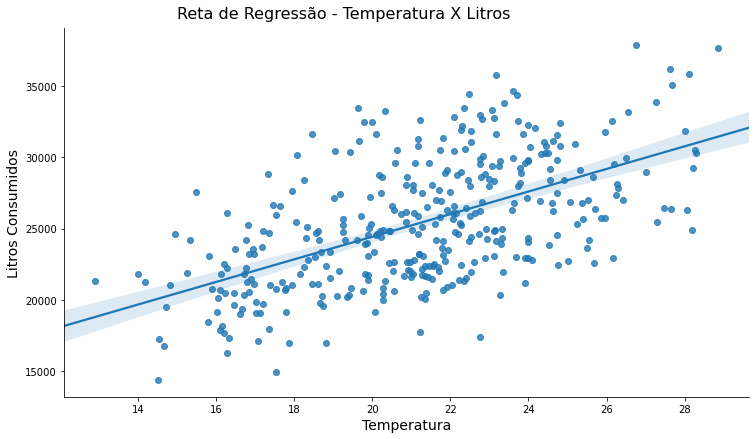

In [16]:
ax = sns.lmplot(x="X", y="Y", data=dados)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Temperatura X Litros', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura", fontsize=14)
ax.set_ylabels("Litros Consumidos", fontsize=14)
ax

### <font color='red'>Utilizando a matriz de correlação</font>

In [17]:
dados.corr()

,Y,X
Y,1.000000,0.574615
X,0.574615,1.000000


### Avalie os resultados acima:

É possível afirmar que existe uma relação linear entre as variáveis?

Resp.: Sim

É possível quantificar a intensidade dessa relação?

Resp.: Sim

É possível afirmar que existe uma relação de causalidade entre $Y$ e $X$ a partir dos resultados da matriz de correlação?

Resp.: Não

### Prepare os dados para estimar um modelo de regressão linear simples

In [19]:
import statsmodels.api as sm

### Estime o modelo de regressão linear simples

In [20]:
Y = dados.Y
X = sm.add_constant(dados.X)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [27]:
resultado_regressao = sm.OLS(Y, X).fit()


In [28]:
resultado_regressao.params

const    8528.907284
X         794.882537
dtype: float64

In [29]:
beta_1 = resultado_regressao.params[0]
beta_1

8528.907283985507

In [30]:
beta_2 = resultado_regressao.params[1]
beta_2

794.8825370043036

In [31]:
resultado_regressao.conf_int(alpha = 0.05)

,0,1
const,6020.879619,11036.934949
X,678.026860,911.738214


### Visualize o resultado da regressão

In [22]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     178.9
Date:                Sat, 01 Apr 2023   Prob (F-statistic):           1.87e-33
Time:                        14:41:06   Log-Likelihood:                -3506.3
No. Observations:                 365   AIC:                             7017.
Df Residuals:                     363   BIC:                             7024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8528.9073   1275.363      6.687      0.0

### Obtenha o $Y$ previsto

In [32]:
dados["Y_previsto"] = beta_1 + beta_2*dados.X
dados.head()

,Y,X,Y_previsto
0,25461,27.30,30229.200544
1,28972,27.02,30006.633434
2,30814,24.82,28257.891852
3,29799,23.98,27590.190521
4,28900,23.82,27463.009315


In [33]:
def prever(x):
    return beta_1 + beta_2*x

### Utilizando nosso modelo estimado para fazer previsões.
### Qual seria o consumo de cerveja para um dia com temperatura média de 42° C?

In [34]:
prever(42)

41913.973838166254

### Obtenha os resíduos da regressão

In [36]:
dados["Residuos"] = dados.Y - dados.Y_previsto
dados.head()

,Y,X,Y_previsto,u,Residuos
0,25461,27.30,30229.200544,-4768.200544,-4768.200544
1,28972,27.02,30006.633434,-1034.633434,-1034.633434
2,30814,24.82,28257.891852,2556.108148,2556.108148
3,29799,23.98,27590.190521,2208.809479,2208.809479
4,28900,23.82,27463.009315,1436.990685,1436.990685


### Plote um gráfico de dispersão dos resíduos da regressão contra o $Y$ previsto

<AxesSubplot:title={'center':'Resíduos vs Variável Independente'}, xlabel='X', ylabel='Resíduos'>

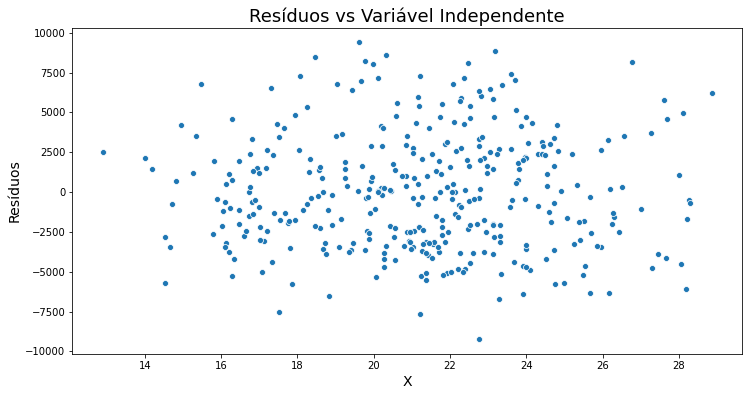

In [37]:
ax = sns.scatterplot(x=dados.X, y=dados.Residuos)
ax.figure.set_size_inches(12, 6)
ax.set_title('Resíduos vs Variável Independente', fontsize=18)
ax.set_xlabel('X', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

### Obtenha o QQPlot dos resíduos

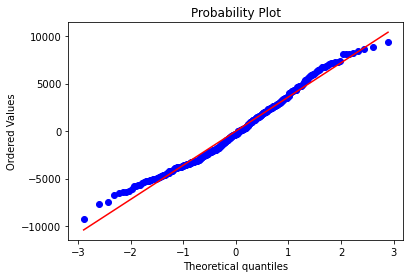

In [38]:
from scipy.stats import probplot
import matplotlib.pyplot as plt 

(_, (_, _, _)) = probplot(dados.Residuos, plot = plt)

### <font color='red'>A partir dos outputs acima, qual conclusão podemos tirar sobre o comportamento dos resíduos?</font>

### Obtenha o R² da regressão pelo método da soma dos quadrados

# $$R^2 = \frac{SQR}{SQT}$$

In [39]:
SQE = resultado_regressao.ssr
SQE

4718394688.067692

In [40]:
SQR = resultado_regressao.ess
SQR

2325899486.7377872

In [41]:
SQT = SQR + SQE
SQT

7044294174.805479

In [43]:
R2 = SQR / SQT
R2

0.33018204933243217

In [44]:
resultado_regressao.rsquared

0.3301820493324321